In [27]:
import time
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from peak_finder import fetch_timetrace, global_peaks, weibull_fit, weib2gumb
%matplotlib inline
plt.rcParams['figure.figsize'] =(16.0, 6.0)

In [41]:
# %% Load data
list_vars = [('Effective Tension', 'EndA'),
             ('Bend Moment', 'Touchdown')]
ttraces = fetch_timetrace(r'C:\tmp\Hs2.50_Tp09.00_WD135_seed1.sim', list_vars)

times = ttraces['time']
signal = ttraces['Bend Moment Touchdown']
#signal = ttraces['Effective Tension EndA']

Loading C:\tmp\Hs2.50_Tp09.00_WD135_seed1.sim. Done.


In [42]:
# %% Detect peaks
sample, spl_times = global_peaks(signal, times)
sorted_sample = sorted(sample)

In [43]:
# %% Fit a Weibull distrubution to the peaks
# shape, loc, scale
wb_params_pwm = weibull_fit(sorted_sample)
wb = ss.frechet_r(*wb_params_pwm)

In [44]:
# %% Calculate a Gumbel distribution for the extreme response
gb_params = weib2gumb(wb_params_pwm, len(sample))
gd = ss.gumbel_r(*gb_params)

In [45]:
# %% Print statistics of peaks
print('Peaks', len(sample))
print('Min', min(sample))
print('Max', max(sample))
print('Std', np.array(sample).std())
print('P10', np.percentile(sample, 10))
print('P50', np.percentile(sample, 50))
print('P90', np.percentile(sample, 90))
print('P99', np.percentile(sample, 99))
print('MPM', gd.ppf(0.37))
print('MPM', wb.ppf(1-1/len(sample)))

Peaks 1107
Min 46.3134115138
Max 132.596069312
Std 14.3686985006
P10 58.1061098419
P50 74.3730478615
P90 94.2673658069
P99 112.98419867
MPM 123.24667061
MPM 123.220261487


In [46]:
# Quality plots
# #############

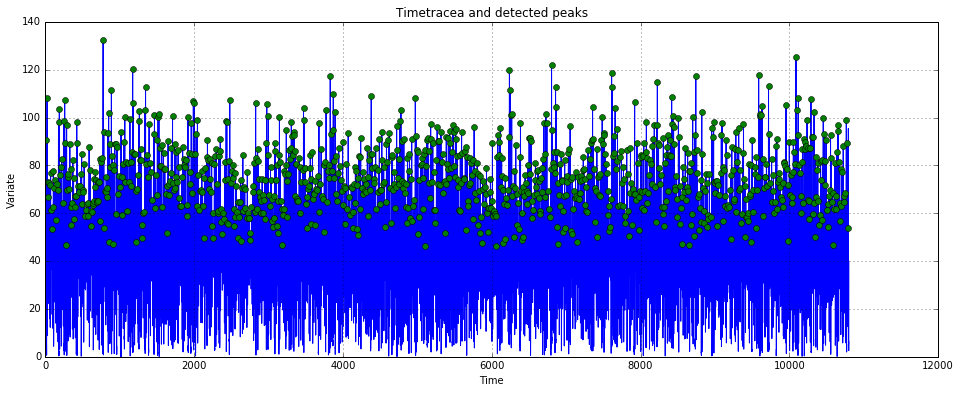

In [47]:
# %% Timetrace and peaks
#%matplotlib
plt.plot(times, signal)
plt.plot(spl_times, sample, 'o')
plt.grid()
plt.title('Timetracea and detected peaks')
plt.xlabel('Time')
plt.ylabel('Variate')
plt.show()
plt.close()

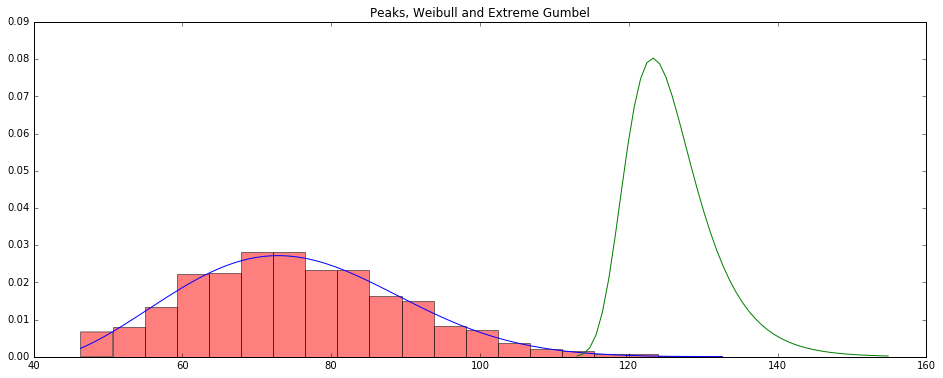

In [48]:
# %% Gumbel extreme
xg = np.linspace(gd.ppf(0.0001), gd.ppf(0.999))
yg = gd.pdf(xg)

plt.plot(sorted_sample, wb.pdf(sorted_sample))
plt.plot(xg, yg)
plt.hist(sample, bins=20, normed=True, alpha=0.5)
plt.title('Peaks, Weibull and Extreme Gumbel')
plt.show()
plt.close()

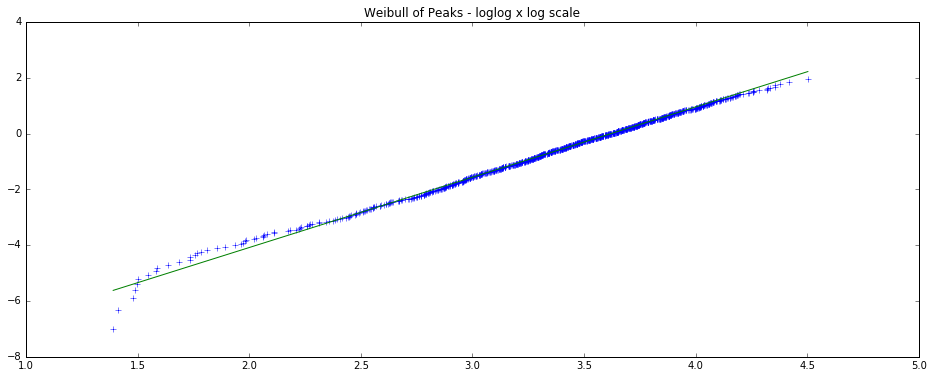

In [49]:
# %% Log-Log paperof Weibull
x = np.linspace(sorted_sample[0], sorted_sample[-1])
N = len(sample)
y = np.array([(i+1)/(N+1) for i in range(N)])
loc = wb_params_pwm[1]
plt.plot(np.log(sorted_sample-loc), np.log(np.log(1/(1-y))), '+')
plt.plot(np.log(x-loc), np.log(np.log(1/(1-wb.cdf(x)))))
plt.title('Weibull of Peaks - loglog x log scale')
plt.show()
plt.close()

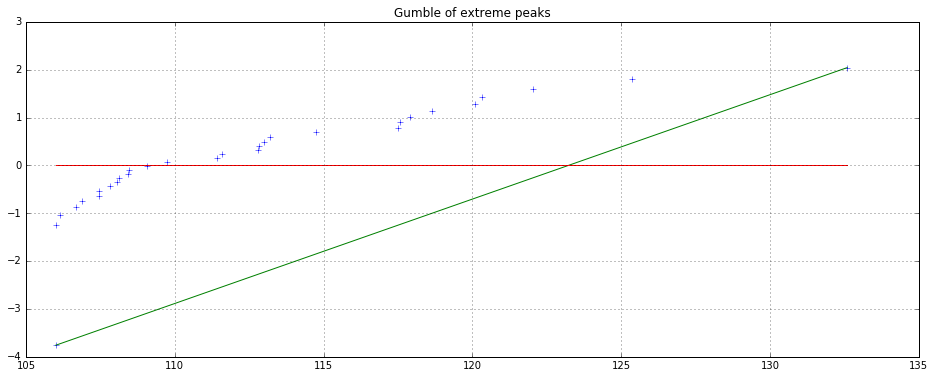

In [50]:
# %% Log-Log paper of Gumbel
N = 30
extremes = sorted_sample[-N:]
x = np.linspace(extremes[0], extremes[-1])
# y = np.array([(i-0.4+1)/(N+0.4) for i in range(N)])
y = np.linspace(gd.cdf(extremes[0]), gd.cdf(extremes[-1]), N)
plt.plot(extremes, -np.log(-np.log(y)), '+')
plt.plot(x, -np.log(-gd.logcdf(x)))
plt.plot((extremes[0], extremes[-1]), -np.log(-np.log([0.37, 0.37])))
plt.grid()
plt.title('Gumble of extreme peaks')
plt.show()
plt.close()

In [51]:
print(time.asctime())

Sat Nov 10 19:48:02 2018


In [52]:
N = len(sorted_sample)
Tz = 10800 / N
wb.ppf(1-1/N)

123.22026148719083